# Selección de caracteristicas importantes

In [ ]:
from google.colab import files
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.stats as stats
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [ ]:
# E:\Pronostico_de_niveles_diarios_Lago_Titicaca\Input_LSTM_LT_mensual.csv
from google.colab import files

uploaded = files.upload()

Saving Input_LSTM_LT_mensual.csv to Input_LSTM_LT_mensual.csv


In [ ]:
input_file="Input_LSTM_LT_mensual.csv"

In [ ]:
# load the dataset
from pandas import read_csv
df = read_csv(input_file, index_col=None, delimiter=',')
df.head()

,Fecha,NLT
0,01/01/1915,3808.810
1,02/01/1915,3808.884
2,03/01/1915,3809.168
3,04/01/1915,3809.200
4,05/01/1915,3809.115


In [ ]:
import pandas as pd

df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%Y')
df

,Fecha,NLT
0,1915-01-01,3808.810
1,1915-02-01,3808.884
2,1915-03-01,3809.168
3,1915-04-01,3809.200
4,1915-05-01,3809.115
...,...,...
1219,2016-08-01,3808.956
1220,2016-09-01,3808.826
1221,2016-10-01,3808.727
1222,2016-11-01,3808.606


In [ ]:
df.describe()

,NLT
count,1224.000000
mean,3809.432900
std,1.040827
min,3806.238000
25%,3808.857000
50%,3809.450000
75%,3810.158500
max,3812.547000


In [ ]:
df.skew()

<ipython-input-6-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


NLT   -0.496996
dtype: float64

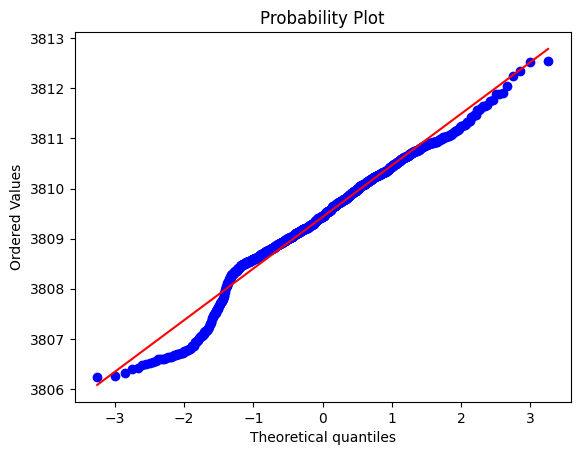

In [ ]:
import numpy as np
import pylab
import scipy.stats as stats

stats.probplot(df['NLT'], dist="norm", plot=pylab)
pylab.show()

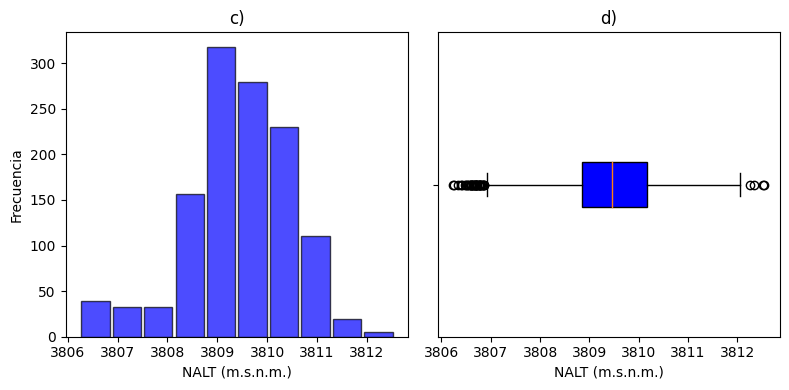

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.hist(df['NLT'], bins=10, color='blue', alpha=0.7, rwidth=0.9, ec="black")
ax1.set_title('c)')
ax1.set_xlabel('NALT (m.s.n.m.)')
ax1.set_ylabel('Frecuencia')
bp = ax2.boxplot([df['NLT']], vert=False, patch_artist=True)
ax2.set_title('d)')
ax2.set_xlabel('NALT (m.s.n.m.)')
ax2.set_yticklabels([])
box_color = 'blue'
for box in bp['boxes']:
    box.set(facecolor=box_color)
plt.tight_layout()
plt.show()

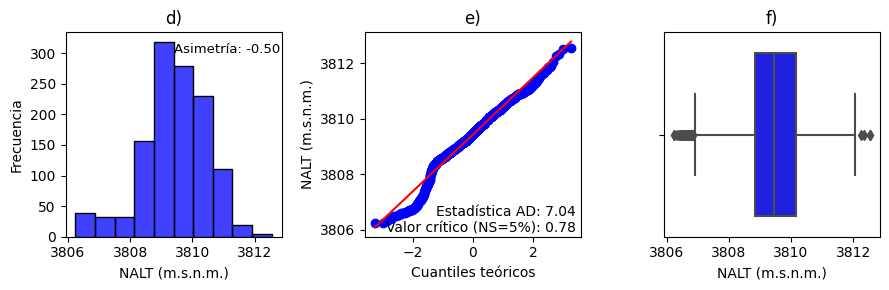

In [ ]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.histplot(df['NLT'], bins=10, color='blue', ax=ax1)
ax1.set_title('d)')
ax1.set_xlabel('NALT (m.s.n.m.)')
ax1.set_ylabel('Frecuencia')
skewness = stats.skew(df['NLT'])
ax1.text(0.5, 0.9, f'Asimetría: {skewness:.2f}', transform=ax1.transAxes, fontsize=9.5, color='black')
stats.probplot(df['NLT'], dist="norm", plot=ax2)
ax2.set_title('e)')
ax2.set_ylabel('NALT (m.s.n.m.)')
ax2.set_xlabel('Cuantiles teóricos')
ax2.get_lines()[0].set_markerfacecolor('blue')
result = stats.anderson(df['NLT'])
ad_statistic = result.statistic
critical_value = result.critical_values[2]
p_value = result.significance_level[2]
ax2.text(0.33, 0.1, f'Estadística AD: {ad_statistic:.2f}', transform=ax2.transAxes, fontsize=10, color='black')
ax2.text(0.1, 0.02, f'Valor crítico (NS=5%): {critical_value:.2f}', transform=ax2.transAxes, fontsize=10, color='black')
sns.boxplot(x=df['NLT'], ax=ax3, color='blue')
ax3.set_title('f)')
ax3.set_xlabel('NALT (m.s.n.m.)')
plt.tight_layout()
plt.show()

In [ ]:
result = stats.anderson(df['NLT'])

print('Estadística de Anderson-Darling:', result.statistic)
print('Valores críticos:', result.critical_values)
print('Niveles de significancia:', result.significance_level)
if result.statistic > result.critical_values[2]:
    print("Los datos no siguen una distribución normal (rechazar la hipótesis nula)")
else:
    print("Los datos siguen una distribución normal (no rechazar la hipótesis nula)")

Estadística de Anderson-Darling: 7.0356229779210935
Valores críticos: [0.574 0.654 0.784 0.915 1.088]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los datos no siguen una distribución normal (rechazar la hipótesis nula)


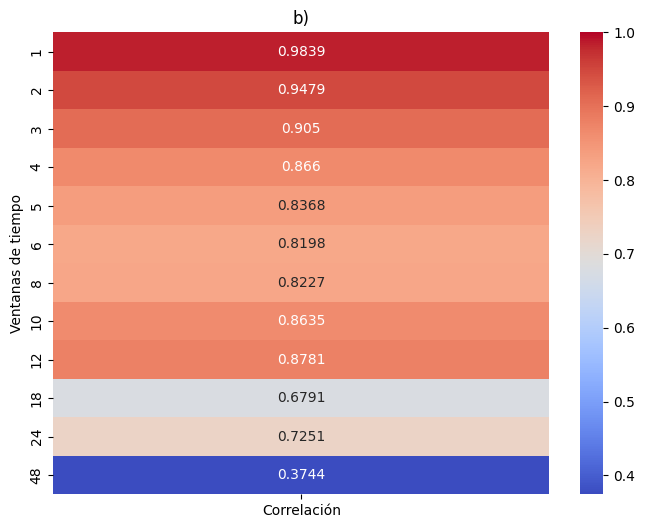

In [ ]:
look_back_values = [1, 2, 3, 4, 5, 6, 8, 10, 12, 18, 24, 48]
correlations = []
for look_back in look_back_values:
    df[f'NLT_lag{look_back}'] = df['NLT'].shift(look_back)
    df_cleaned = df.dropna(subset=['NLT', f'NLT_lag{look_back}'])
    correlation, _ = spearmanr(df_cleaned['NLT'], df_cleaned[f'NLT_lag{look_back}'])
    correlations.append(correlation)
correlation_matrix = pd.DataFrame(correlations, index=look_back_values, columns=['Correlación'])
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, vmax=1, annot=True, fmt='.4g', cmap='coolwarm', cbar=True)
plt.ylabel('Ventanas de tiempo')
plt.title('b)')
plt.show()